In [1]:
from Utils.Helper import Run
from Config import Config

import torch.backends.cudnn as cudnn

# cudnn.benchmark = True # This will break reproducibility
cudnn.deterministic = True # For reproducibility

------------------------------

 >> Starting a new run ...

Key config:

 - Train DS:            10.0% WDF
 - Test DS:             25.0% WDF
 - Loss Type:           standard + Gaze * 16.00 
 - Model Structure:     Basic 
------------------------------
Adjusting learning rate of group 0 to 1.0000e-05.
_IncompatibleKeys(missing_keys=[], unexpected_keys=['avg_decoder.fc.0.weight', 'avg_decoder.fc.0.bias', 'avg_decoder.fc.1.weight', 'avg_decoder.fc.1.bias', 'avg_decoder.fc.2.weight', 'avg_decoder.fc.2.bias'])
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch0/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:54:57 
- Mean Out Loss: 0.7350
- Mean Acc: 0.5187
- Mean Total Loss: 18.2684
- Mean Gaze Loss: 1.0958


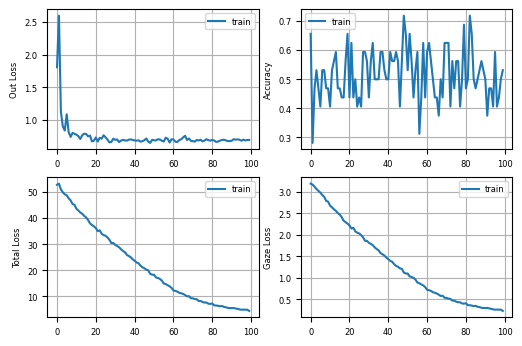

Adjusting learning rate of group 0 to 9.5000e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch1/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:56:04 
- Mean Out Loss: 0.6868
- Mean Acc: 0.5614
- Mean Total Loss: 1.9473
- Mean Gaze Loss: 0.0788


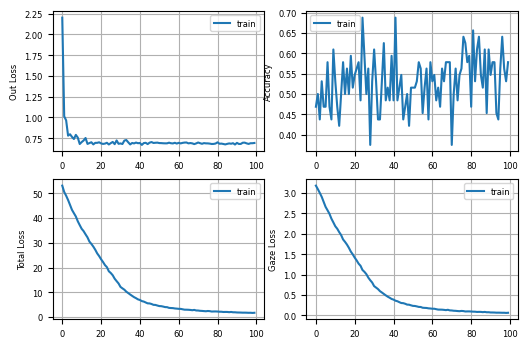

Adjusting learning rate of group 0 to 9.0250e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch2/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:57:09 
- Mean Out Loss: 0.6771
- Mean Acc: 0.5899
- Mean Total Loss: 1.0886
- Mean Gaze Loss: 0.0257


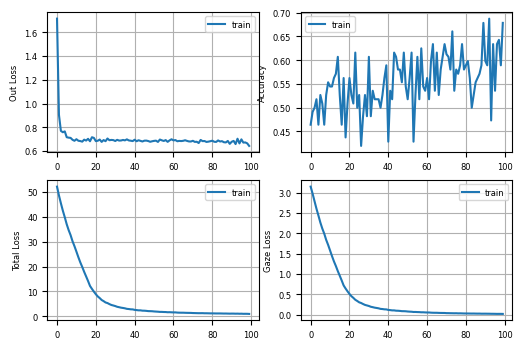

Adjusting learning rate of group 0 to 8.5738e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch3/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:58:15 
- Mean Out Loss: 0.6481
- Mean Acc: 0.6332
- Mean Total Loss: 0.8568
- Mean Gaze Loss: 0.0130


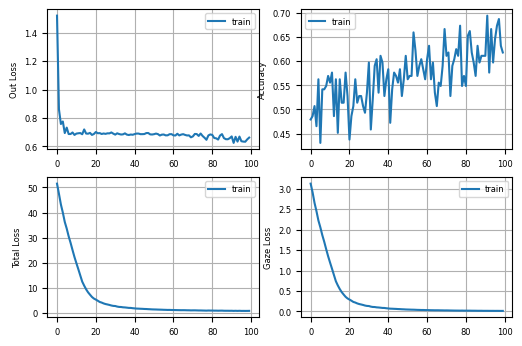

Adjusting learning rate of group 0 to 8.1451e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch4/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:59:21 
- Mean Out Loss: 0.6069
- Mean Acc: 0.6756
- Mean Total Loss: 0.7399
- Mean Gaze Loss: 0.0083


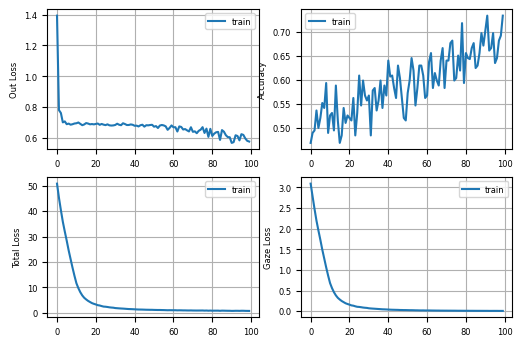

Adjusting learning rate of group 0 to 7.7378e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch5/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:00:27 
- Mean Out Loss: 0.5280
- Mean Acc: 0.7416
- Mean Total Loss: 0.6293
- Mean Gaze Loss: 0.0063


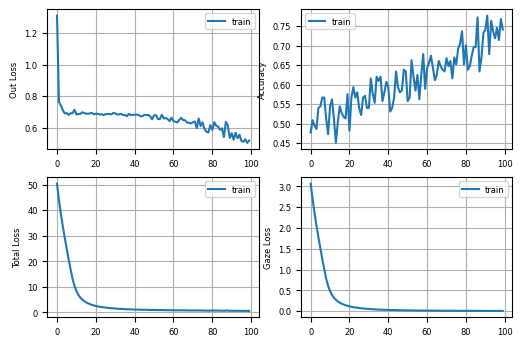

Adjusting learning rate of group 0 to 7.3509e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch6/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:01:33 
- Mean Out Loss: 0.4543
- Mean Acc: 0.7932
- Mean Total Loss: 0.5411
- Mean Gaze Loss: 0.0054


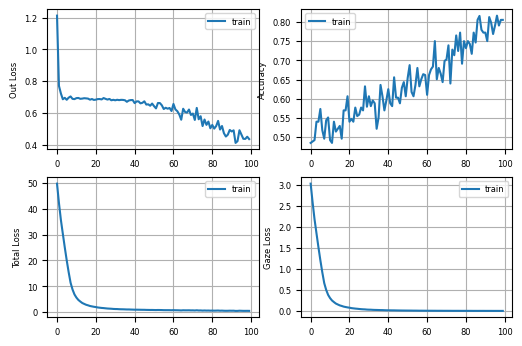

Adjusting learning rate of group 0 to 6.9834e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch7/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:02:39 
- Mean Out Loss: 0.3911
- Mean Acc: 0.8288
- Mean Total Loss: 0.4645
- Mean Gaze Loss: 0.0046


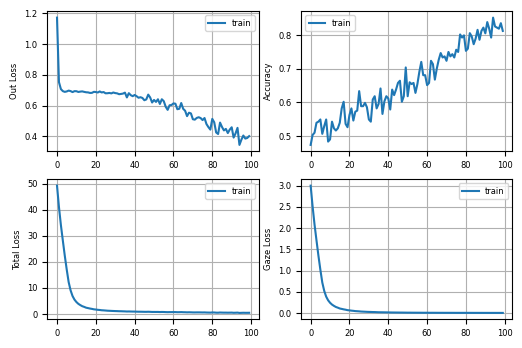

Adjusting learning rate of group 0 to 6.6342e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch8/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:03:44 
- Mean Out Loss: 0.3378
- Mean Acc: 0.8595
- Mean Total Loss: 0.4024
- Mean Gaze Loss: 0.0040


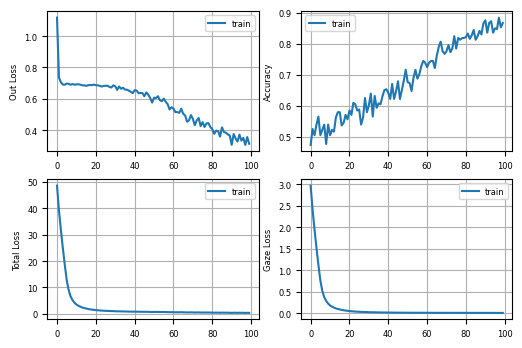

Adjusting learning rate of group 0 to 6.3025e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch9/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:04:50 
- Mean Out Loss: 0.3086
- Mean Acc: 0.8680
- Mean Total Loss: 0.3655
- Mean Gaze Loss: 0.0036


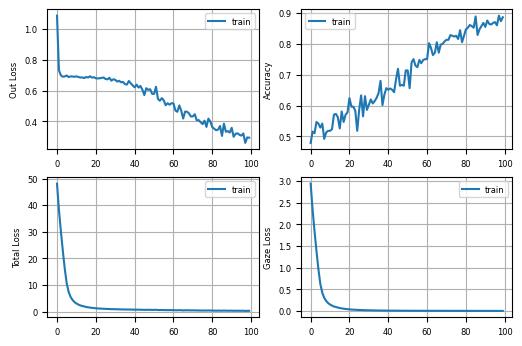

Adjusting learning rate of group 0 to 5.9874e-06.

Training finished!
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:05:35
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 2255     | 2637     |
| Pred F | 2295     | 3023     |
 > Total 10210 samples
 > Acc: 0.5169 | Loss: 0.6927
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:06:19
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 2529     | 2824     |
| Pred F | 2021     | 2836     |
 > Total 10210 samples
 > Acc: 0.5255 | Loss: 0.6934
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:07:03
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3661     | 3851     |
| Pred F | 889      | 1809     |
 > Total 10210 samples
 > Acc: 0.5357 | Loss: 0.6992
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:07:47
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 4004     | 4015     |
| Pred F | 546      | 1645     |
 > Total 10210 samples
 > Acc: 0.5533 | Loss: 0.6806
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:08:30
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3346     | 2144     |
| Pred F | 1204     | 3516     |
 > Total 10210 samples
 > Acc: 0.6721 | Loss: 0.5945
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:09:14
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3644     | 2380     |
| Pred F | 906      | 3280     |
 > Total 10210 samples
 > Acc: 0.6782 | Loss: 0.6002
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:09:57
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 4051     | 2666     |
| Pred F | 499      | 2994     |
 > Total 10210 samples
 > Acc: 0.6900 | Loss: 0.6156
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:10:41
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3806     | 2003     |
| Pred F | 744      | 3657     |
 > Total 10210 samples
 > Acc: 0.7310 | Loss: 0.5765
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:11:24
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 4117     | 2793     |
| Pred F | 433      | 2867     |
 > Total 10210 samples
 > Acc: 0.6840 | Loss: 0.7177
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:12:08
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3384     | 1473     |
| Pred F | 1166     | 4187     |
 > Total 10210 samples
 > Acc: 0.7415 | Loss: 0.5637


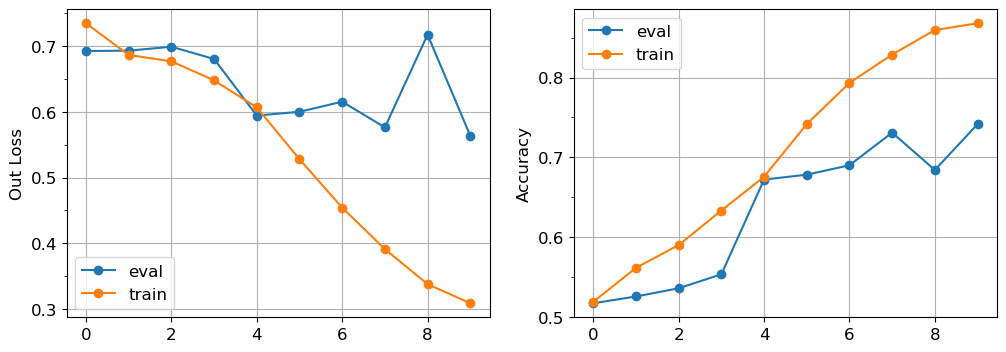

In [2]:
config = Config()
config.basic['tryID'] = 'Gaze256_x_16.0'
config.loss['gaze_weight'] = 16.0
config.model['emb_dim'] = 256
Run(config)

------------------------------

 >> Starting a new run ...

Key config:

 - Train DS:            10.0% WDF
 - Test DS:             25.0% WDF
 - Loss Type:           standard + Gaze * 16.00 
 - Model Structure:     Basic 
------------------------------
Adjusting learning rate of group 0 to 1.0000e-05.
_IncompatibleKeys(missing_keys=[], unexpected_keys=['avg_decoder.fc.0.weight', 'avg_decoder.fc.0.bias', 'avg_decoder.fc.1.weight', 'avg_decoder.fc.1.bias', 'avg_decoder.fc.2.weight', 'avg_decoder.fc.2.bias'])
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch0/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:28:14 
- Mean Out Loss: 0.7031
- Mean Acc: 0.5605
- Mean Total Loss: 14.1354
- Mean Gaze Loss: 0.8395


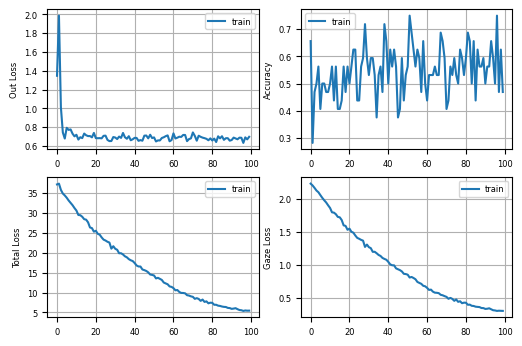

Adjusting learning rate of group 0 to 9.5000e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch1/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:29:20 
- Mean Out Loss: 0.6553
- Mean Acc: 0.6121
- Mean Total Loss: 2.4834
- Mean Gaze Loss: 0.1143


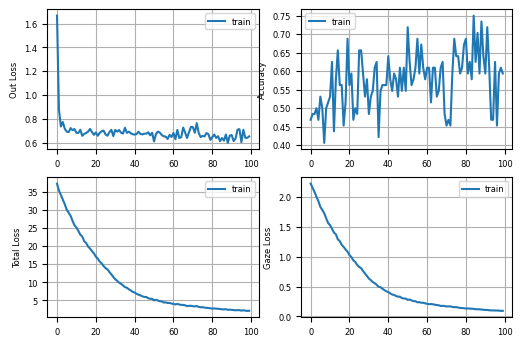

Adjusting learning rate of group 0 to 9.0250e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch2/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:30:24 
- Mean Out Loss: 0.5886
- Mean Acc: 0.6885
- Mean Total Loss: 1.3286
- Mean Gaze Loss: 0.0463


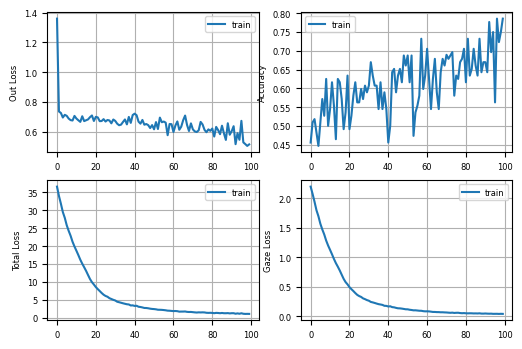

Adjusting learning rate of group 0 to 8.5738e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch3/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:31:29 
- Mean Out Loss: 0.5032
- Mean Acc: 0.7558
- Mean Total Loss: 1.0233
- Mean Gaze Loss: 0.0325


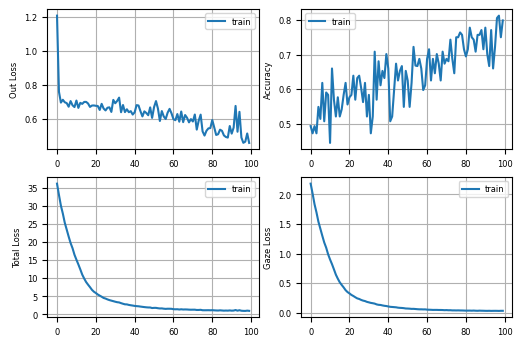

Adjusting learning rate of group 0 to 8.1451e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch4/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:32:35 
- Mean Out Loss: 0.4336
- Mean Acc: 0.8034
- Mean Total Loss: 0.8999
- Mean Gaze Loss: 0.0291


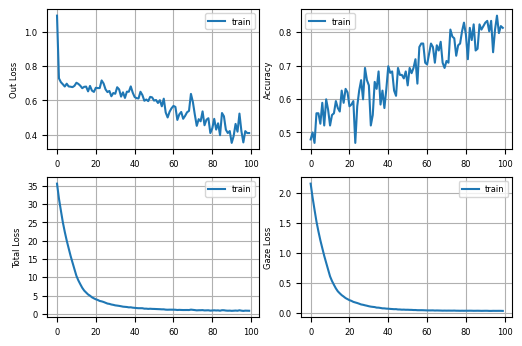

Adjusting learning rate of group 0 to 7.7378e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch5/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:33:40 
- Mean Out Loss: 0.3606
- Mean Acc: 0.8441
- Mean Total Loss: 0.8013
- Mean Gaze Loss: 0.0275


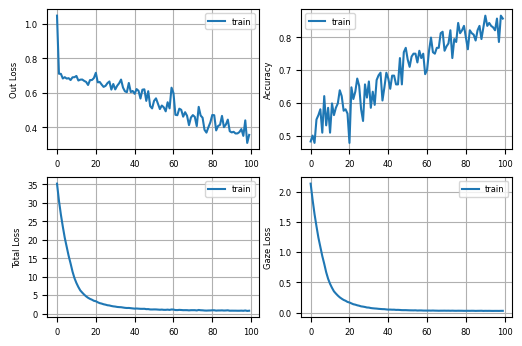

Adjusting learning rate of group 0 to 7.3509e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch6/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:34:46 
- Mean Out Loss: 0.3136
- Mean Acc: 0.8699
- Mean Total Loss: 0.7450
- Mean Gaze Loss: 0.0270


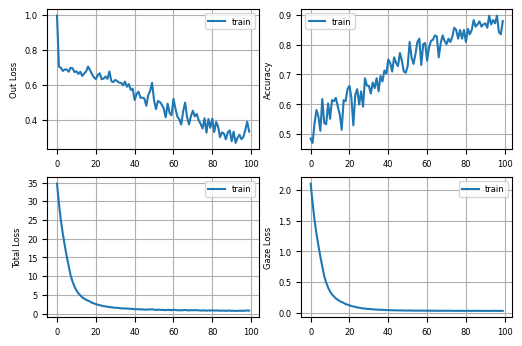

Adjusting learning rate of group 0 to 6.9834e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch7/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:35:51 
- Mean Out Loss: 0.2829
- Mean Acc: 0.8873
- Mean Total Loss: 0.6998
- Mean Gaze Loss: 0.0261


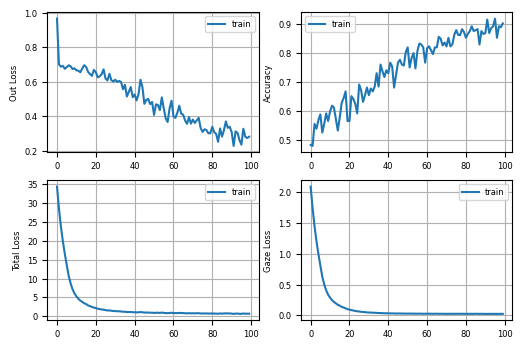

Adjusting learning rate of group 0 to 6.6342e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch8/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:36:56 
- Mean Out Loss: 0.2445
- Mean Acc: 0.9030
- Mean Total Loss: 0.6573
- Mean Gaze Loss: 0.0258


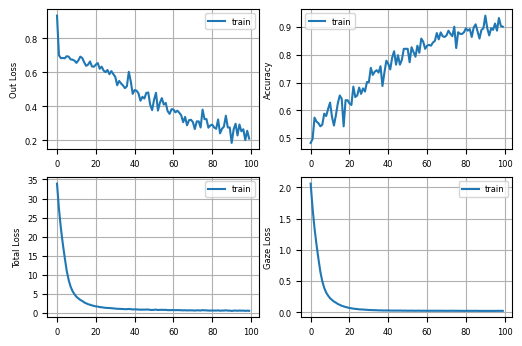

Adjusting learning rate of group 0 to 6.3025e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch9/
--------------------------------------------------


--------------------------------------------------
2023-07-04 16:38:02 
- Mean Out Loss: 0.2400
- Mean Acc: 0.8993
- Mean Total Loss: 0.6488
- Mean Gaze Loss: 0.0255


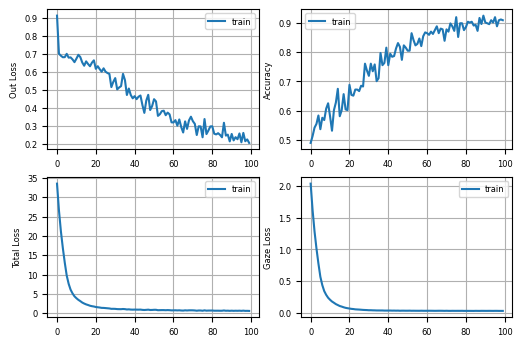

Adjusting learning rate of group 0 to 5.9874e-06.

Training finished!
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 16:38:48
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 4239     | 4949     |
| Pred F | 311      | 711      |
 > Total 10210 samples
 > Acc: 0.4848 | Loss: 0.7205
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 16:39:32
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3928     | 3497     |
| Pred F | 622      | 2163     |
 > Total 10210 samples
 > Acc: 0.5966 | Loss: 0.6517
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 16:40:16
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3169     | 1964     |
| Pred F | 1381     | 3696     |
 > Total 10210 samples
 > Acc: 0.6724 | Loss: 0.5941
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 16:41:00
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3846     | 2543     |
| Pred F | 704      | 3117     |
 > Total 10210 samples
 > Acc: 0.6820 | Loss: 0.6247
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 16:41:43
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3873     | 2348     |
| Pred F | 677      | 3312     |
 > Total 10210 samples
 > Acc: 0.7037 | Loss: 0.5959
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 16:42:27
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3679     | 1788     |
| Pred F | 871      | 3872     |
 > Total 10210 samples
 > Acc: 0.7396 | Loss: 0.5717
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 16:43:11
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3741     | 1784     |
| Pred F | 809      | 3876     |
 > Total 10210 samples
 > Acc: 0.7460 | Loss: 0.5467
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 16:43:54
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3905     | 2120     |
| Pred F | 645      | 3540     |
 > Total 10210 samples
 > Acc: 0.7292 | Loss: 0.6328
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 16:44:38
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3981     | 2220     |
| Pred F | 569      | 3440     |
 > Total 10210 samples
 > Acc: 0.7268 | Loss: 0.6679
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 16:45:21
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3725     | 1903     |
| Pred F | 825      | 3757     |
 > Total 10210 samples
 > Acc: 0.7328 | Loss: 0.6291


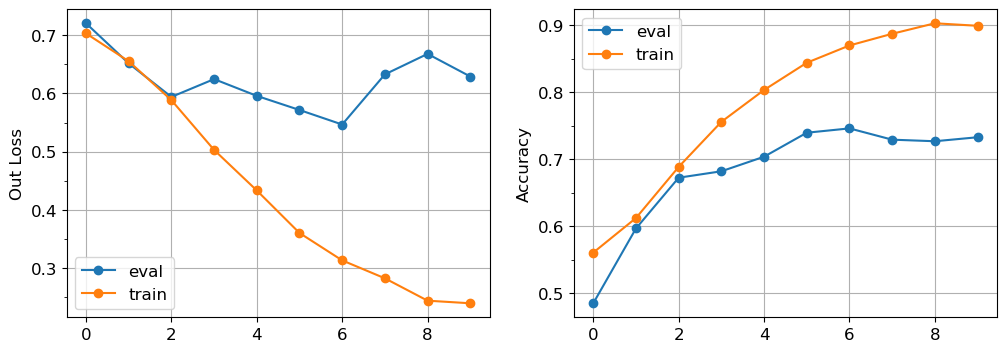

In [2]:
config = Config()
config.basic['tryID'] = 'Gaze_x_16.0'
config.loss['gaze_weight'] = 16.0
Run(config)

------------------------------

 >> Starting a new run ...

Key config:

 - Train DS:            10.0% WDF
 - Test DS:             25.0% WDF
 - Loss Type:           standard + Gaze * 1.00 
 - Model Structure:     Basic 
------------------------------
Adjusting learning rate of group 0 to 1.0000e-05.
_IncompatibleKeys(missing_keys=[], unexpected_keys=['avg_decoder.fc.0.weight', 'avg_decoder.fc.0.bias', 'avg_decoder.fc.1.weight', 'avg_decoder.fc.1.bias', 'avg_decoder.fc.2.weight', 'avg_decoder.fc.2.bias'])
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch0/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:13:14 
- Mean Out Loss: 0.6867
- Mean Acc: 0.6125
- Mean Total Loss: 2.4613
- Mean Gaze Loss: 1.7746


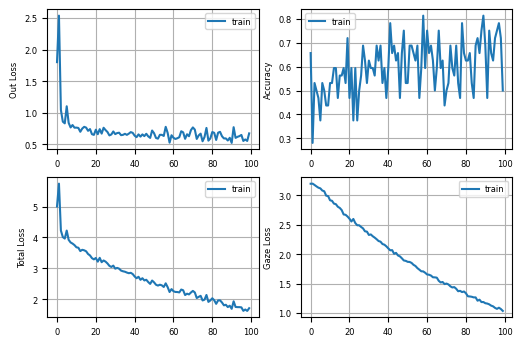

Adjusting learning rate of group 0 to 9.5000e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch1/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:14:20 
- Mean Out Loss: 0.5179
- Mean Acc: 0.7431
- Mean Total Loss: 0.9297
- Mean Gaze Loss: 0.4119


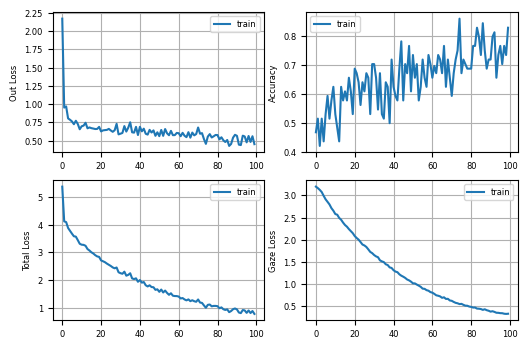

Adjusting learning rate of group 0 to 9.0250e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch2/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:15:26 
- Mean Out Loss: 0.3984
- Mean Acc: 0.8211
- Mean Total Loss: 0.5575
- Mean Gaze Loss: 0.1591


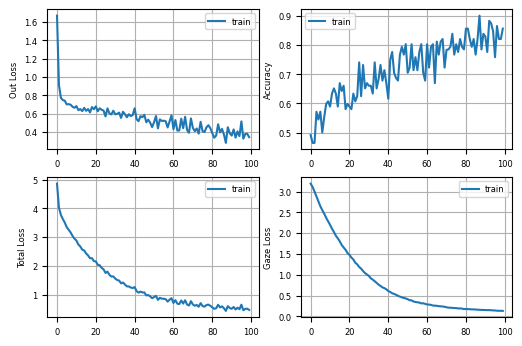

Adjusting learning rate of group 0 to 8.5738e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch3/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:16:32 
- Mean Out Loss: 0.3109
- Mean Acc: 0.8674
- Mean Total Loss: 0.4131
- Mean Gaze Loss: 0.1023


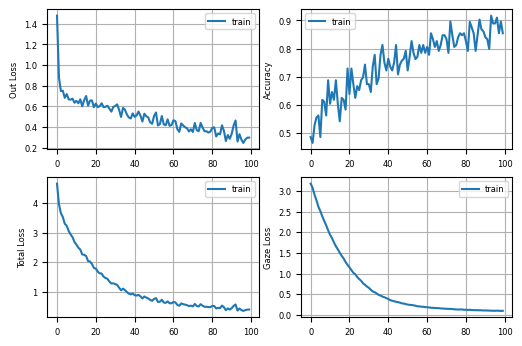

Adjusting learning rate of group 0 to 8.1451e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch4/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:17:38 
- Mean Out Loss: 0.2769
- Mean Acc: 0.8872
- Mean Total Loss: 0.3538
- Mean Gaze Loss: 0.0769


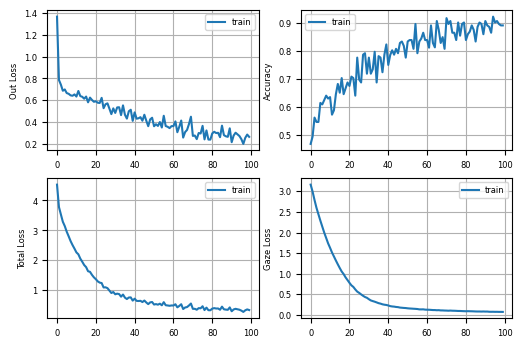

Adjusting learning rate of group 0 to 7.7378e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch5/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:18:44 
- Mean Out Loss: 0.2301
- Mean Acc: 0.9078
- Mean Total Loss: 0.2936
- Mean Gaze Loss: 0.0635


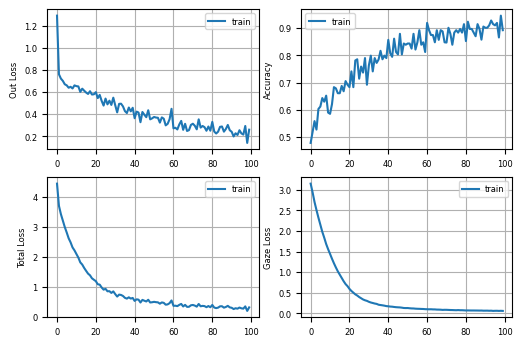

Adjusting learning rate of group 0 to 7.3509e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch6/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:19:50 
- Mean Out Loss: 0.1891
- Mean Acc: 0.9258
- Mean Total Loss: 0.2439
- Mean Gaze Loss: 0.0547


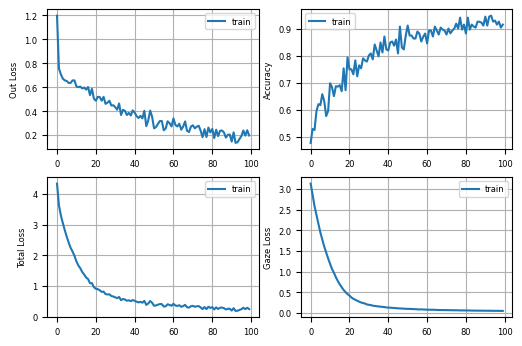

Adjusting learning rate of group 0 to 6.9834e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch7/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:20:56 
- Mean Out Loss: 0.1702
- Mean Acc: 0.9324
- Mean Total Loss: 0.2188
- Mean Gaze Loss: 0.0486


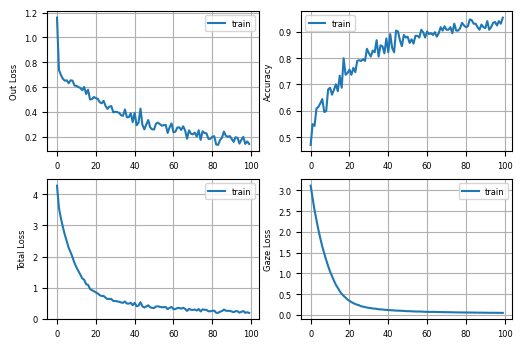

Adjusting learning rate of group 0 to 6.6342e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch8/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:22:01 
- Mean Out Loss: 0.1485
- Mean Acc: 0.9409
- Mean Total Loss: 0.1929
- Mean Gaze Loss: 0.0443


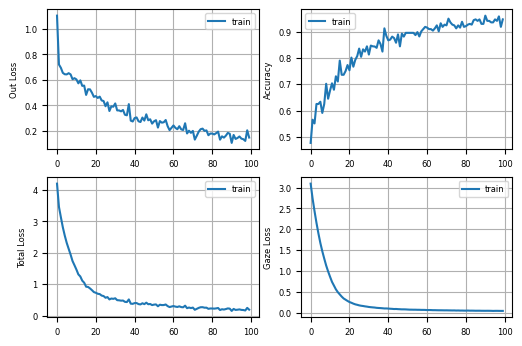

Adjusting learning rate of group 0 to 6.3025e-06.
[*] Loading dataset from: /home/kyr/GazeForensicsData/temp/WDF_10.0%_epoch9/
--------------------------------------------------


--------------------------------------------------
2023-07-04 17:23:07 
- Mean Out Loss: 0.1409
- Mean Acc: 0.9459
- Mean Total Loss: 0.1809
- Mean Gaze Loss: 0.0400


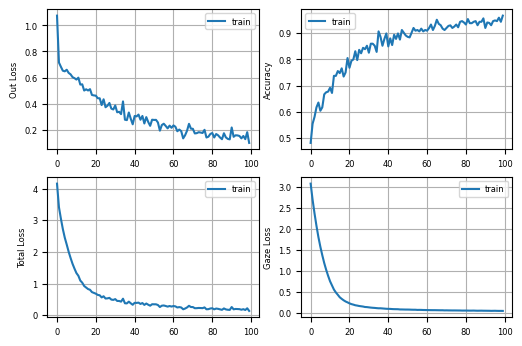

Adjusting learning rate of group 0 to 5.9874e-06.

Training finished!
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:23:52
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 4150     | 4042     |
| Pred F | 400      | 1618     |
 > Total 10210 samples
 > Acc: 0.5649 | Loss: 0.7439
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:24:36
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3595     | 2385     |
| Pred F | 955      | 3275     |
 > Total 10210 samples
 > Acc: 0.6729 | Loss: 0.6339
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:25:20
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 4159     | 3062     |
| Pred F | 391      | 2598     |
 > Total 10210 samples
 > Acc: 0.6618 | Loss: 0.7610
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:26:03
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 4231     | 3172     |
| Pred F | 319      | 2488     |
 > Total 10210 samples
 > Acc: 0.6581 | Loss: 0.8715
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:26:47
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3508     | 1819     |
| Pred F | 1042     | 3841     |
 > Total 10210 samples
 > Acc: 0.7198 | Loss: 0.6263
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:27:30
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3916     | 2158     |
| Pred F | 634      | 3502     |
 > Total 10210 samples
 > Acc: 0.7265 | Loss: 0.6762
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:28:14
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3652     | 1873     |
| Pred F | 898      | 3787     |
 > Total 10210 samples
 > Acc: 0.7286 | Loss: 0.6654
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:28:57
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 3885     | 2027     |
| Pred F | 665      | 3633     |
 > Total 10210 samples
 > Acc: 0.7363 | Loss: 0.7464
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:29:41
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 4090     | 2330     |
| Pred F | 460      | 3330     |
 > Total 10210 samples
 > Acc: 0.7267 | Loss: 0.8118
--------------------------------------------------


--------------------------------------------------
Time: 2023-07-04 17:30:24
 > Confusion Matrix:
|        | Actual T | Actual F |
| Pred T | 4048     | 2407     |
| Pred F | 502      | 3253     |
 > Total 10210 samples
 > Acc: 0.7151 | Loss: 0.8892


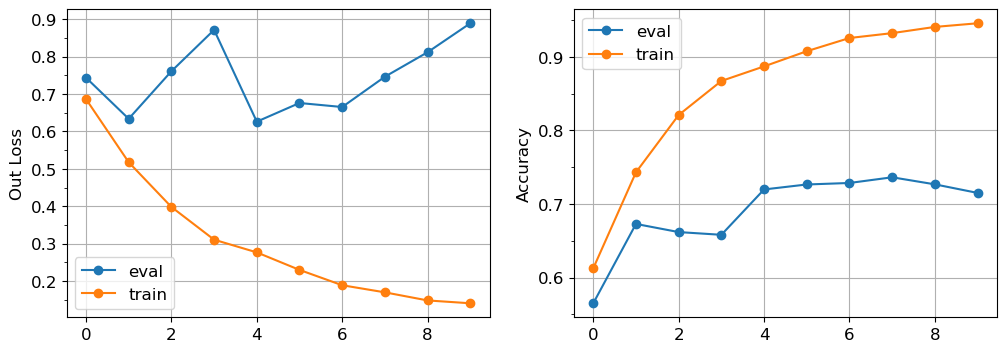

In [3]:
config = Config()
config.basic['tryID'] = 'Gaze256_x_1.0'
config.loss['gaze_weight'] = 1.0
config.model['emb_dim'] = 256
Run(config)